<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-CarlosAlbertoNievesPerez/blob/main/Semana_5_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre-Processing Data in Python 2:09

      "It is the process of converting or mapping data from one “raw” form into another format to make it ready for further analysis"

##Simple data frame operations

      Para agregar un numero o algo a una columna lo que hacemos es el siguiente codigo donde "symboling" es el titulo de la columna:

      df["symboling"]=df["symboling"]+1

      Aqui lo que hicimos es agregar un 1 a todas las celdas de la columna "symboling"

##Dealing with missing values in Python

      Dropping data:

      When you drop data, you can either drop the whole variable or just the single data.
      If you don’t have a lot of observations with missing data, usually dropping the particular entry is the best.

      




      Replacing data:

      Replacing data is better, since no data is wasted. However, it is less accurate since we need to replace missing data with a guess of what the data should be.
      One standard replacement technique is to replace missing values by the **average value** of the entire variable.

##Dropping missing values in Python

      To remove data that contains missing values, pandas library has a built-in method called **‘dropna’**.

      Axis=0 *Drops the entire row*
      Axis=1 *Drops the entire column*

      Ejemplo donde "df" es nuestra info, "dropna" es la funcion y "price" es la columna donde se encuentra la informacion faltante:
      
      df.dropna(subset=["price"], axis=0, inplace=True)

      Setting the argument “inplace” to “true” allows the modification to be done on the dataset directly. 
      “Inplace=True” just writes the result back into the dataframe.

      Si en inplace no pones nada,automaticamente seria FALSE y no se modificará el data set.

##Replacing missing values in Python

      To replace missing values like NaNs with actual values, pandas library has a built in method called ‘replace’, 
      which can be used to fill in the missing values with the newly calculated values.

      dataframe.replace(missing_value,new_value):

      Ejemplo donde el nombre de la columna es "normalized-losses" y donde se busca reemplazar el valor o los valores faltantes por un promedio de los valores de esa columna.

      Primero tenemos que calcular el promedio de la columna con el siguiente codigo:
      mean=df["normalized-losses"].mean()

      Despues usamos replace con el siguiente codigo:
      df["normalized-losses"].replace(np.nan,mean)
      El parametro np.nan se refiere a los missing values y con el mean que le sigue se refiere al promedio que calculamos en el codigo anterior. 



##Applying calculations to an entire column and converting data types

      Data formatting means bringing data into a common standard of expression that allows 
      users to make meaningful comparisons.

      Ejemplo donde el titulo de la columna es "city-mpg" referente a miles per galon y donde queremos convertir km x litro a mpg. 
      Para poderlo convertir tenemos que dividir 235 entre cada uno de los valores de la columna km x litro como en el 
      siguiente codigo: 

      df["city-mpg"]=235/df["city-mpg"]

      Para corregir tipos de data primero tenemos que identificar que tipo de informacion es la que tenemos.
      Esto lo hacemos con el siguiente codigo:
      
      dataframe.dtypes()

      Para converitr data types usamos el siguiente codigo:

      dataframe.astype()
      df["price"]=df["price"].astype("int")

##Data Normalization

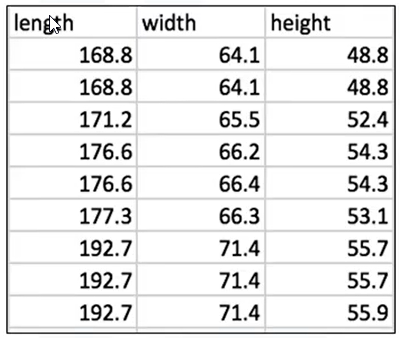

      Podemos ver en la tabla anterior que altura tiene un rango mucho mas grande que las otras dos variables 
      por lo que necesitamos normalizar la informacion para que la informacion sea consistente al usarla.

      When we do further analysis, like linear regression, for example, the attribute "length" will
      intrinsically influence the result more, due to its larger value, but this doesn’t necessarily
      mean it is more ‘important’ as a predictor.



##Methods of normailizing data:

      SIMPLE FEATURE SCALING:

      The first method, called “simple feature scaling”, just divides each value by the
      maximum value for that feature.This makes the new values range between 0 and 1.


      MIN-MAX

      The second method, called “Min-Max”, takes each value, X_old, subtracted from the minimum value of that feature, 
      then divides by the range of that feature (MAX-MIN). Again, the resulting new values range between 0 and 1.


      Z-SCORE

      In this formula, for each value, you subtract the Mu which is the average of the feature, 
      and then divide by the standard deviation (sigma). 
      The resulting values hover around 0, and typically range between -3 and +3, but can be higher or lower.




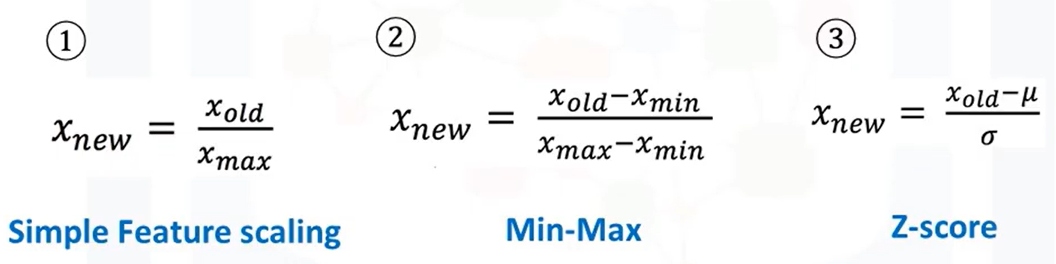

      De acuerdo al ejemplo inicial podemos normalizar "length" con el siguiente codigo:

      SIMPLE FEATURE SCALING

      df["length"]=df["length"]/df["length].max()


      MIN-MAX

      df["length"]=(df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())


      Z-SCORE

      df["length"]= (df["length"]-df["length"].MEAN())/df["length"].STD()
      

##Binning

      Binning is when you group values together into bins. For example, you can bin “age”
      into [0 to 5], [6 to 10], [11 to 15] and so on.
      Sometimes, binning can improve accuracy of the predictive models.
      In addition, sometimes we use data binning to group a set of numerical values into a
      smaller number of bins to have a better understanding of the data distribution.


      As example, “price” here is an attribute range from 5,000 to 45,500.
      Using binning, we categorize the price into three bins: low price, medium price, and high prices.

      In Python we can easily implement the binning: We would like 3 bins of equal binwidth, so
      we need 4 numbers as dividers that are equal distance apart.

      bins=np.linspace(min(df["price"]),max(df["price]),4)


      We create a list “group_names “ that contains the different bin names.

      group_names=["Low","Medium","High"]


      We use the pandas function ”cut” to segment and sort the data values into bins.

      df["price-binned"]=pd.cut(df["price"],bins,labels=group_names,include_lowest=True)

##Turning categorical variables into quantitative variables

      Most statistical models cannot take in objects or strings as input and, for model training,
      only take the numbers as inputs.

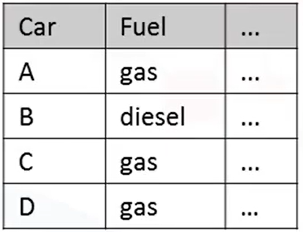

      Para converitrlo a numero como fuel tiene dos variables unicas podemos crear dos columnas nuevas de la siguiente manera:

      "ONE-HOT ENCODING"

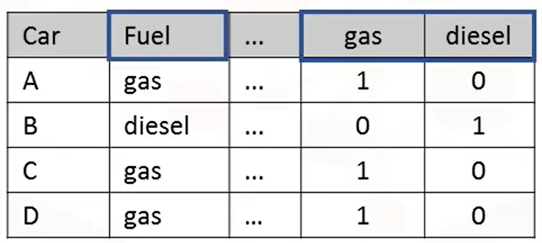

      In pandas, we can use get_dummies() method to convert categorical variables to dummy:

      pd.get_dummies(df['fuel'])